# Dicision Tree

In [6]:
# pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [7]:
# pip install graphviz - install using cmd

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Load the dataset from a CSV file

In [2]:
data = pd.read_csv('iris-1.csv')

## Explore the dataset with EDA

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Visualize the dataset

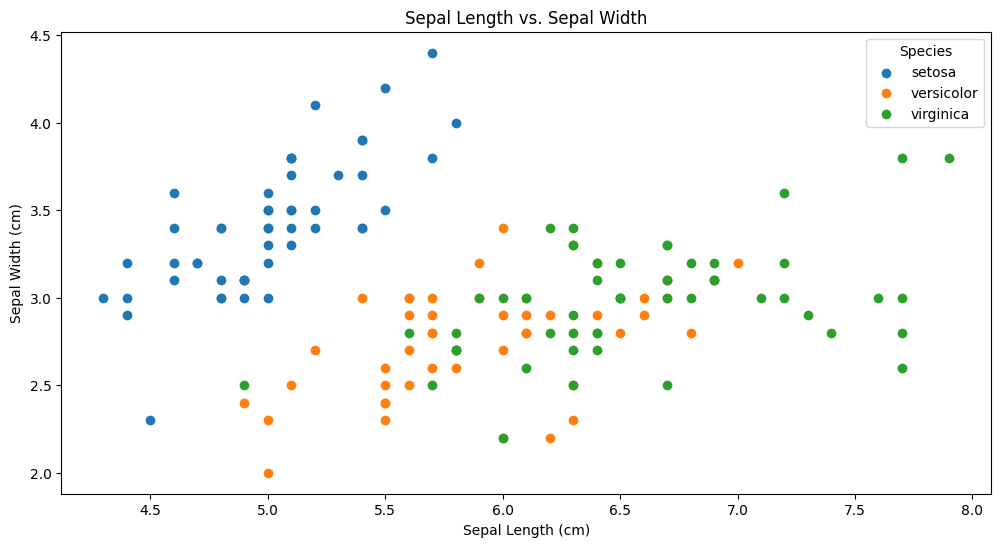

In [5]:
# Scatter plot of the features colored by class
plt.figure(figsize=(12, 6))
for species, species_data in data.groupby('species'):
    plt.scatter(species_data['sepal_length'], species_data['sepal_width'], label=species)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.title('Sepal Length vs. Sepal Width')
plt.show()

## Data Preprocessing

In [6]:
# Split the data into features and target
X = data.drop('species', axis=1)
y = data['species']

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Decision Tree Classifier

In [8]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

In [9]:
# Train the decision tree model
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
# Visualize the decision tree
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=X.columns,
    class_names=y.unique(),
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("iris_decision_tree.png")

True

In [11]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)

In [12]:
# Evaluate the model's performance
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


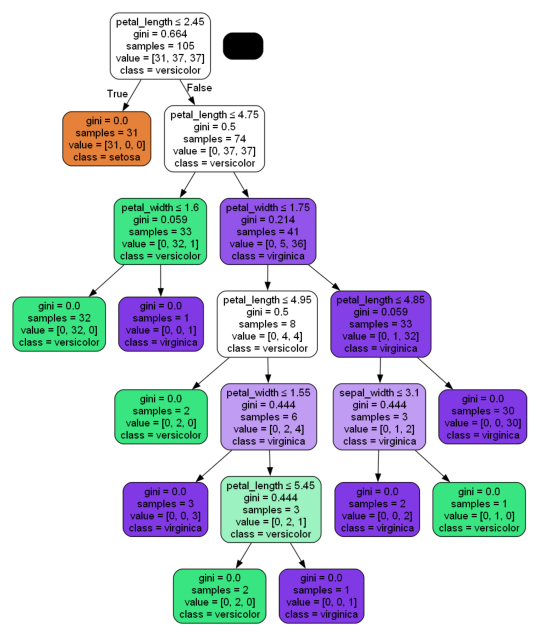

In [13]:
# Show the decision tree visualization (can be found in the current directory)
plt.figure(figsize=(12, 8))
plt.imshow(plt.imread("iris_decision_tree.png"))
plt.axis('off')
plt.show()

# Building & Evaluating Random Forest and Gradient Boosting models

- Comparing the results with the single Decision Tree model

In [14]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [15]:
# Create and train a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Make predictions using Random Forest
rf_y_pred = rf_clf.predict(X_test)

In [17]:
# Evaluate Random Forest model
rf_accuracy = metrics.accuracy_score(y_test, rf_y_pred)
rf_precision = metrics.precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = metrics.recall_score(y_test, rf_y_pred, average='weighted')
rf_f1_score = metrics.f1_score(y_test, rf_y_pred, average='weighted')

# Print evaluation metrics for Random Forest
print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1_score:.2f}")

Random Forest Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [18]:
# Create and train a Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [19]:
# Make predictions using Gradient Boosting
gb_y_pred = gb_clf.predict(X_test)

In [20]:
# Evaluate Gradient Boosting model
gb_accuracy = metrics.accuracy_score(y_test, gb_y_pred)
gb_precision = metrics.precision_score(y_test, gb_y_pred, average='weighted')
gb_recall = metrics.recall_score(y_test, gb_y_pred, average='weighted')
gb_f1_score = metrics.f1_score(y_test, gb_y_pred, average='weighted')

# Print evaluation metrics for Gradient Boosting
print("\nGradient Boosting Metrics:")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")
print(f"F1 Score: {gb_f1_score:.2f}")


Gradient Boosting Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [21]:
# Compare results with single Decision Tree
print("\nComparison with Single Decision Tree:")
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")


Comparison with Single Decision Tree:
Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00
Gradient Boosting Accuracy: 1.00


# Building & Evaluating Random Forest and Gradient Boosting models

- Comparing the results with the two Decision Tree model

In [22]:
# Create and train two separate Decision Tree classifiers
tree1 = DecisionTreeClassifier(random_state=42)
tree1.fit(X_train, y_train)

tree2 = DecisionTreeClassifier(random_state=42, max_depth=3)  # Limited depth for the second tree
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [23]:
# Make predictions using the two decision trees
tree1_y_pred = tree1.predict(X_test)
tree2_y_pred = tree2.predict(X_test)

In [24]:
# Evaluate the first decision tree
tree1_accuracy = metrics.accuracy_score(y_test, tree1_y_pred)
tree1_precision = metrics.precision_score(y_test, tree1_y_pred, average='weighted')
tree1_recall = metrics.recall_score(y_test, tree1_y_pred, average='weighted')
tree1_f1_score = metrics.f1_score(y_test, tree1_y_pred, average='weighted')

In [25]:
# Evaluate the second decision tree
tree2_accuracy = metrics.accuracy_score(y_test, tree2_y_pred)
tree2_precision = metrics.precision_score(y_test, tree2_y_pred, average='weighted')
tree2_recall = metrics.recall_score(y_test, tree2_y_pred, average='weighted')
tree2_f1_score = metrics.f1_score(y_test, tree2_y_pred, average='weighted')

In [26]:
# Print evaluation metrics for the two decision trees
print("Decision Tree 1 Metrics:")
print(f"Accuracy: {tree1_accuracy:.2f}")
print(f"Precision: {tree1_precision:.2f}")
print(f"Recall: {tree1_recall:.2f}")
print(f"F1 Score: {tree1_f1_score:.2f}")

print("\nDecision Tree 2 Metrics:")
print(f"Accuracy: {tree2_accuracy:.2f}")
print(f"Precision: {tree2_precision:.2f}")
print(f"Recall: {tree2_recall:.2f}")
print(f"F1 Score: {tree2_f1_score:.2f}")

Decision Tree 1 Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Decision Tree 2 Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [27]:
# Compare the results of all models
print("\nComparison of Models:")
print(f"Decision Tree 1 Accuracy: {tree1_accuracy:.2f}")
print(f"Decision Tree 2 Accuracy: {tree2_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")



Comparison of Models:
Decision Tree 1 Accuracy: 1.00
Decision Tree 2 Accuracy: 1.00
Random Forest Accuracy: 1.00
Gradient Boosting Accuracy: 1.00
